# Luminosity plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data
tbl = pd.read_csv('preprocessed_data.csv')
display(tbl.head())

# TODO combine bands where needed

,Unnamed: 0,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,...,Xray_Flux (erg/s/cm2),Xray_errup,Xray_errlow,Xray_upplim,Xray_Flux_source,L_X,L_X_errup,L_X_errlow,L_X_upplim,Comments
0,0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,2.000000e-11,5.000000e-12,5.000000e-12,NaN,Thesis Bilal 2018,2.159674e+35,NaN,NaN,NaN,NaN
1,1,RX_J1735.3-3540,J,3090,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,2.000000e-11,5.000000e-12,5.000000e-12,NaN,Thesis Bilal 2018,2.159674e+35,NaN,NaN,NaN,NaN
2,2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,2.000000e-11,5.000000e-12,5.000000e-12,NaN,Thesis Bilal 2018,2.159674e+35,NaN,NaN,NaN,Initially very large magnitude offset but seem...
3,3,RX_J1735.3-3540,H,3072,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,2.000000e-11,5.000000e-12,5.000000e-12,NaN,Thesis Bilal 2018,2.159674e+35,NaN,NaN,NaN,Initially large magnitude offset but seems oka...
4,4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",...,2.000000e-11,5.000000e-12,5.000000e-12,NaN,Thesis Bilal 2018,2.159674e+35,NaN,NaN,NaN,Initially large magnitude offset but seems oka...


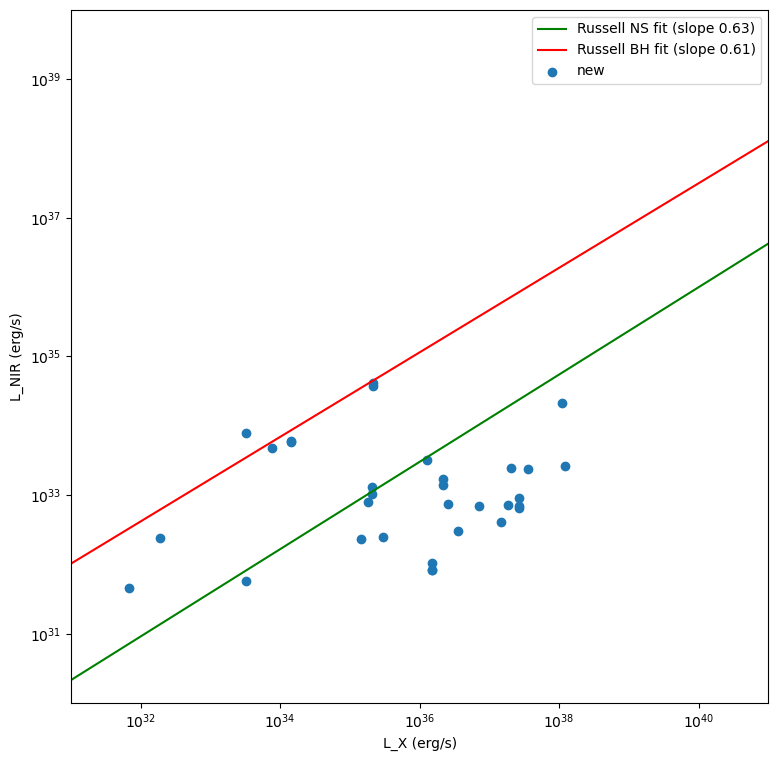

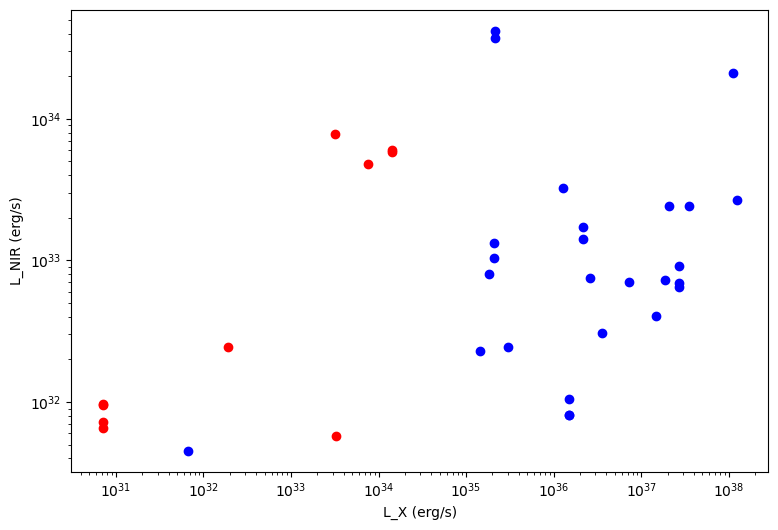

In [4]:

tbl = tbl[tbl['Filter']=='Ks'] # TODO


fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

ax.scatter(tbl['L_X'], tbl['L_NIR'], label='new')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e39)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (9, 6))

for n, r in tbl.iterrows():
    s = r['Source']
    if s in quiescent_sources: 
        c = 'Red'
    else:
        c = 'Blue'
#     plt.scatter(ratio_list[n], source_list[n], color=c, zorder=10)
    ax.scatter(tbl['L_X'][n], tbl['L_NIR'][n], color=c)  
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e30, 10e40)
# ax.set_ylim(10e29, 10e39)
plt.show()


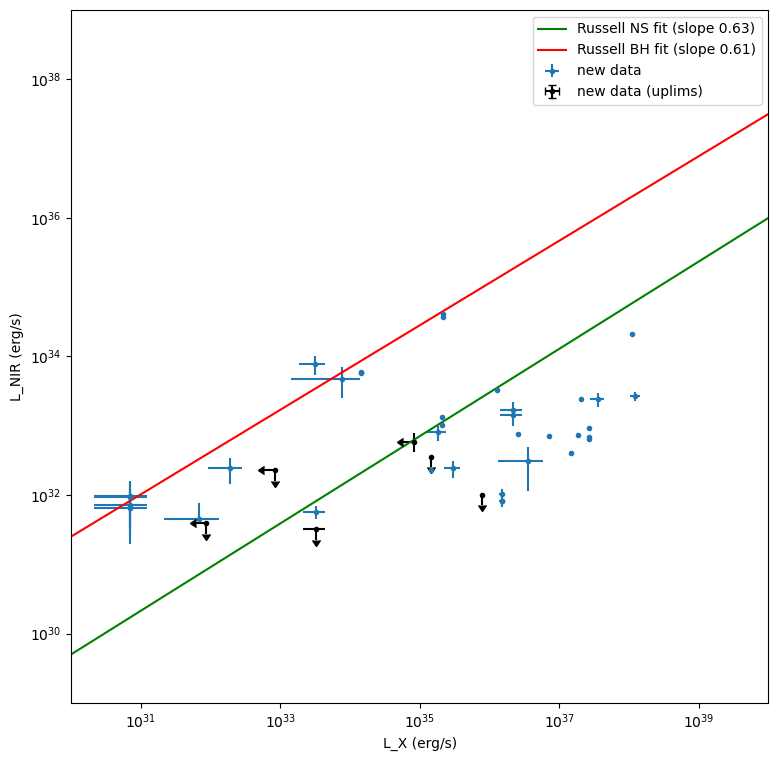

In [20]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

# Plot regular data points 
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# Plot points with only upplim on NIR luminosity
ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# Plot points with only upplim on X-ray luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

# Plot points with upplims on X-ray luminosity and NIR luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


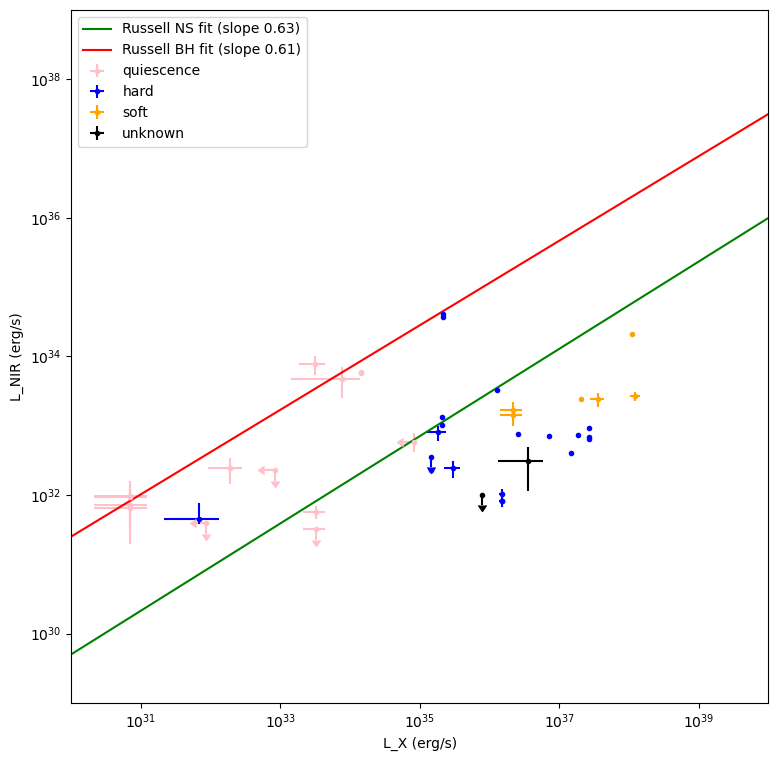

In [53]:
# Separate on state 
states = pd.read_csv('FSRED Mags - total_source_list.csv')
quiescent_sources = states[states['Hard/soft state ']=='quiescence']['Source'].to_list()
quiescent_tbl = tbl[tbl['Source'].isin(quiescent_sources)]
hard_sources = states[states['Hard/soft state ']=='hard']['Source'].to_list()
hard_tbl = tbl[tbl['Source'].isin(hard_sources)]
soft_sources = states[states['Hard/soft state ']=='soft']['Source'].to_list()
soft_tbl = tbl[tbl['Source'].isin(soft_sources)]
unknown_states = states[(states['Hard/soft state ']=='unknown if XRB') | (states['Hard/soft state ']=='unknown')]['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_states)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=3, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, quiescent_tbl , color='pink', label='quiescence')
plotfunc(ax, hard_tbl , color='blue', label='hard')
plotfunc(ax, soft_tbl , color='orange', label='soft')
plotfunc(ax, unknown_tbl , color='k', label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

plt.legend()
plt.show()


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


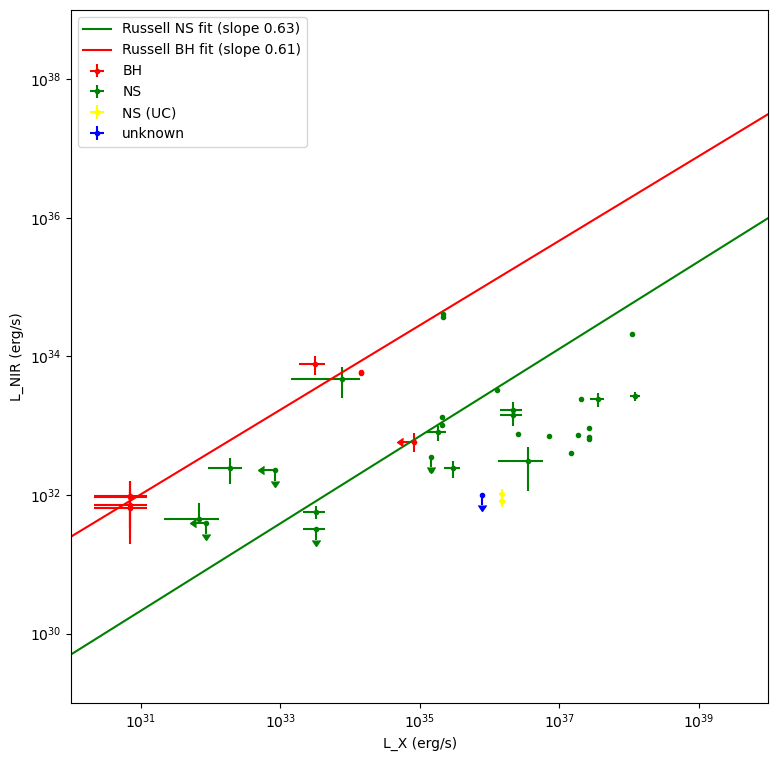

In [63]:
# Separate on compact object
bhs = states[states['NS/BH']=='BH']['Source'].to_list()
BH_tbl = tbl[tbl['Source'].isin(bhs)]
nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ')]['Source'].to_list()
NS_tbl = tbl[tbl['Source'].isin(nss)]
nss_uc = states[states['NS/BH']=='NS (UC)']['Source'].to_list()
NSUC_tbl = tbl[tbl['Source'].isin(nss_uc)]
unknown_CO = states[states['NS/BH']=='unknown']['Source'].to_list()
unknown_tbl = tbl[tbl['Source'].isin(unknown_CO)]

# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=3, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

# Plot quiescent sources
# plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, BH_tbl , color='red', label='BH')
plotfunc(ax, NS_tbl , color='green', label='NS')
plotfunc(ax, NSUC_tbl , color='yellow', label='NS (UC)')
plotfunc(ax, unknown_tbl , color='blue', label='unknown')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

plt.legend()
plt.show()


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


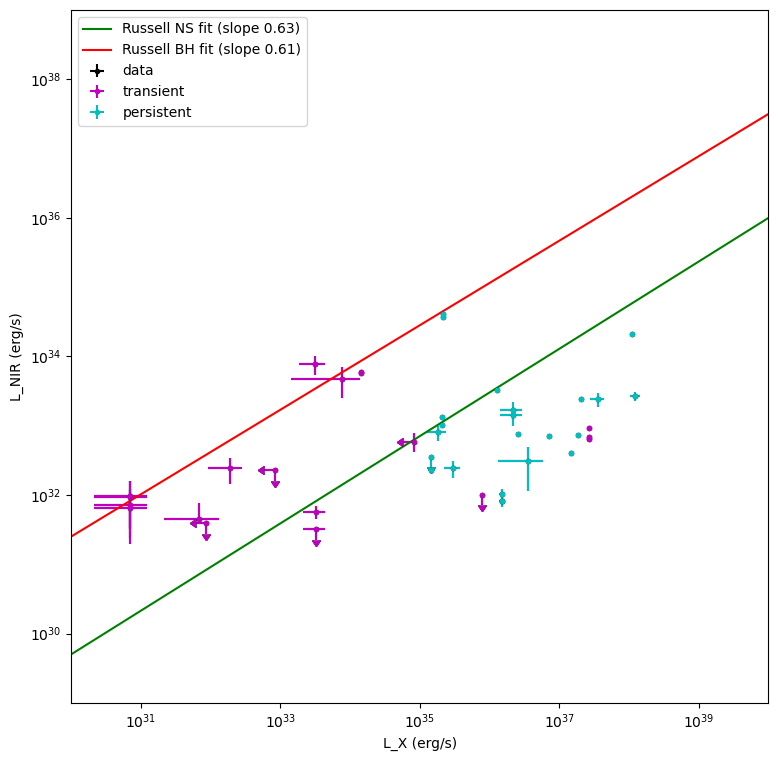

In [72]:
# Separate on transient/persistent
transients = states[states['Transient/persistent']=='transient']['Source'].to_list()
transients_tbl = tbl[tbl['Source'].isin(transients)]
persistents = states[(states['Transient/persistent']=='persistent') | (states['Transient/persistent']=='persistent ')]['Source'].to_list()
persistents_tbl = tbl[tbl['Source'].isin(persistents)]


# Plot Russell relations (Russel+2006)
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.3

def plotfunc(ax, tbl, color, label): 
    # Plot regular data points 
    ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label=label, fmt='o', ms=3, color=color)

    # Plot points with only upplim on NIR luminosity
    ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color=color)

# Plot quiescent sources
plotfunc(ax, tbl, color='k', label='data')
plotfunc(ax, transients_tbl , color='m', label='transient')
plotfunc(ax, persistents_tbl , color='c', label='persistent')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

plt.legend()
plt.show()


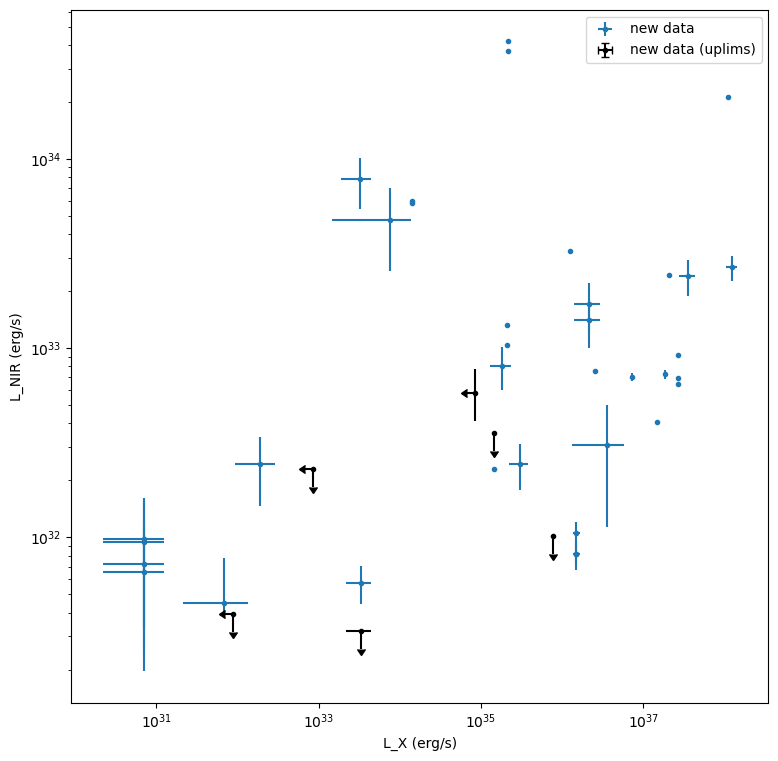

In [26]:
fig, ax = plt.subplots(figsize = (9, 9))
# xrange= np.logspace(29, 41, num=10)
# y = 10**10.8 * xrange**(0.63)
# ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
# y_bh = 10**13.1 * xrange**0.61
# ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.2

# Plot regular data points 
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# Plot points with only upplim on NIR luminosity
ax.errorbar(tbl['L_X'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], uplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# Plot points with only upplim on X-ray luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

# Plot points with upplims on X-ray luminosity and NIR luminosity
ax.errorbar(tbl['L_X_upplim'], tbl['L_NIR_upplim'], yerr=tbl['L_NIR_upplim']*arrow_scale, xerr=tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(tbl))], xuplims =[True for i in range(len(tbl))], fmt='o', ms=3, color='k')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e29, 10e39)
# ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

In [27]:
# TODO fit powerlaw to data?
from scipy.optimize import curve_fit

# objective function
def objective(L_x, a, b):
    return 10**a * L_x ** b


valid = ~(np.isnan(tbl['L_X']) | np.isnan(tbl['L_NIR']))
popt, _ = curve_fit(objective, tbl['L_X'][valid], tbl['L_NIR'][valid], p0=[10, 1])
print(popt)

y_fit = objective(xrange, popt[0], popt[1])


[-4.24406264  1.00542886]


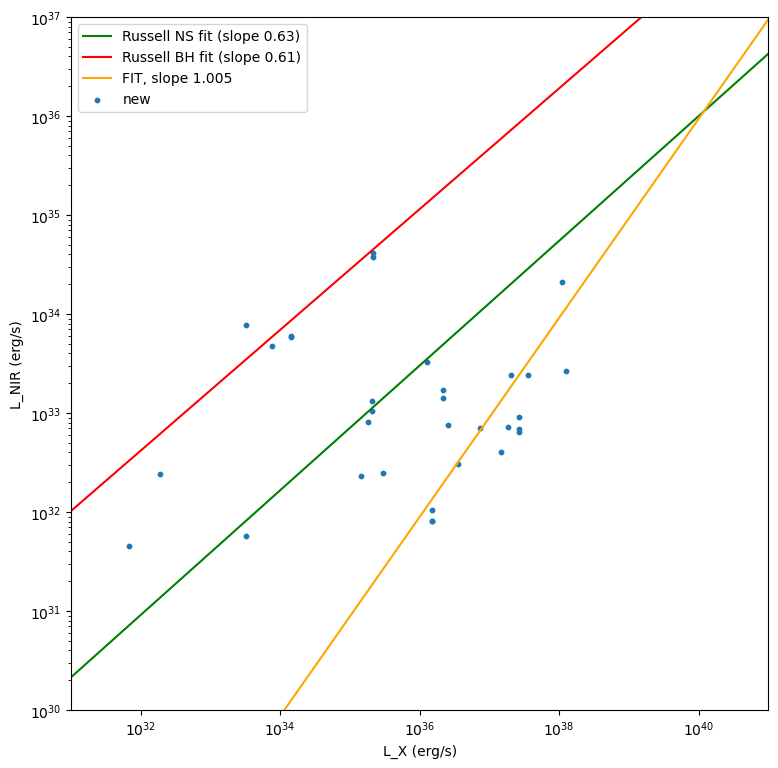

In [28]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')
ax.plot(xrange, y_fit, c='orange', label='FIT, slope ' + str(round(popt[1], 3)))

ax.scatter(tbl['L_X'], tbl['L_NIR'], label='new', s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e36)
plt.legend()
plt.show()

In [ ]:
# TODO compare powerlaw with models